In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving Covid_19_Analysis.zip to Covid_19_Analysis.zip


In [ ]:
df = pd.read_csv('Covid_19_Analysis.zip')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
df.isnull().sum()


,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Date'].nunique()

188

In [ ]:
df['Country/Region'].nunique()

187

In [ ]:
df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

,Confirmed
Country/Region,
US,224345948
Brazil,89524967
Russia,45408411
India,40883464
Spain,27404045
United Kingdom,26748587
Italy,26745145
France,21210926
Germany,21059152


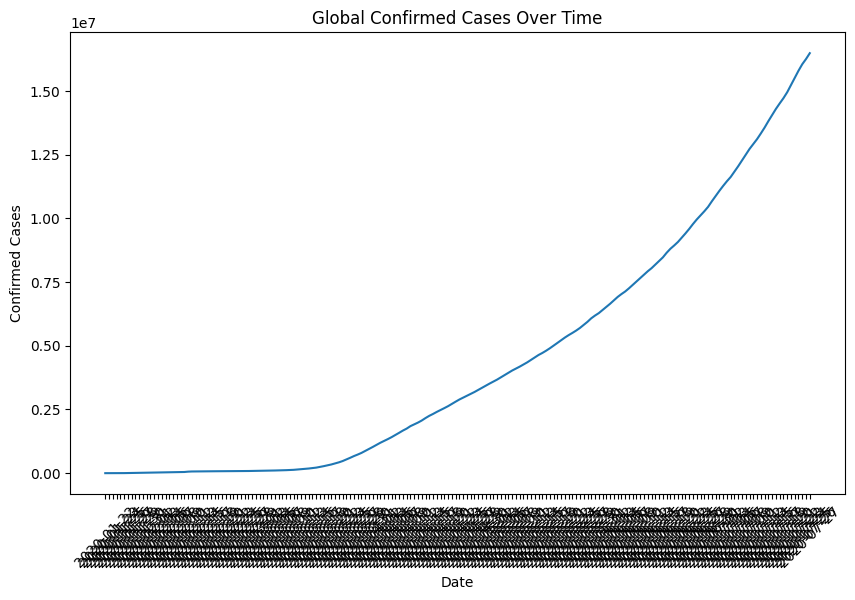

In [ ]:
df_grouped = df.groupby('Date')['Confirmed'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_grouped['Date'], df_grouped['Confirmed'])
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

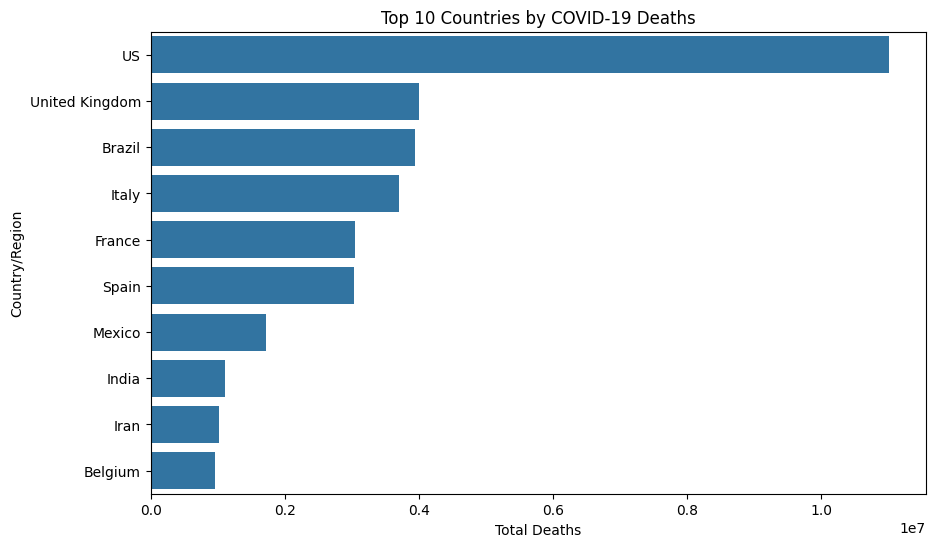

In [ ]:
deaths_by_country = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=deaths_by_country.values, y=deaths_by_country.index)
plt.title('Top 10 Countries by COVID-19 Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country/Region')
plt.show()


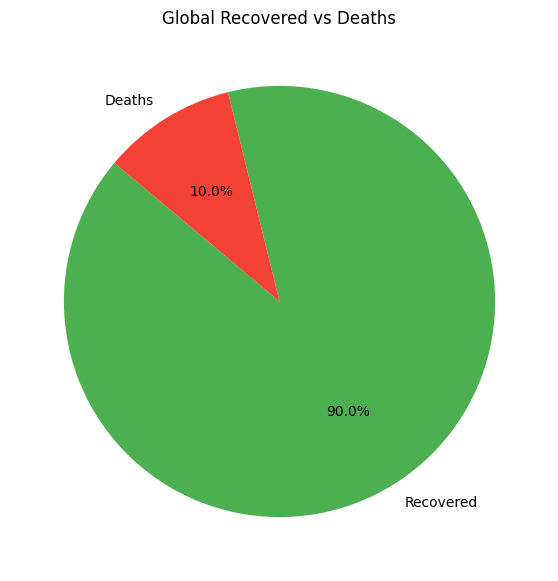

In [ ]:
total_recovered = df['Recovered'].sum()
total_deaths = df['Deaths'].sum()

plt.figure(figsize=(7,7))
plt.pie([total_recovered, total_deaths],
        labels=['Recovered', 'Deaths'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['#4CAF50', '#F44336'])
plt.title('Global Recovered vs Deaths')
plt.show()
